1. Segmentasi Pelanggan bertujuan untuk memahami kelompok pelanggan dengan membagi mereka ke dalam cluster berdasarkan karakteristik yang relevan.

2. Analisis Spesifikasi Laptop bertujuan untuk memahami faktor-faktor yang mempengaruhi harga laptop dengan menganalisis fitur-fitur dan memilih fitur yang paling berpengaruh.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

# **Gathering Data**

In [4]:
customer_df = pd.read_excel("/content/customer_data.xlsx")
customer_df.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5


In [5]:
laptop_df = pd.read_csv("/content/laptop_data.csv")
laptop_df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# **Asessing Data**

Menilai Tabel laptop

In [6]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
laptop_df.isna().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
Cpu_brand,0
HDD,0


In [8]:
print("Jumlah duplikasi: ", laptop_df.duplicated().sum())

Jumlah duplikasi:  1


In [9]:
customer_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai Tabel Customer

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2240 non-null   datetime64[ns]
 5   Recency            2240 non-null   int64         
 6   NumWebPurchases    2240 non-null   int64         
 7   NumStorePurchases  2240 non-null   int64         
 8   NumWebVisitsMonth  2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 157.6+ KB


In [11]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
customer_df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Income,24
Dt_Customer,0
Recency,0
NumWebPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0


In [13]:
income_mean = customer_df['Income'].mean()
customer_df['Income'].fillna(income_mean, inplace=True)
customer_df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Income,0
Dt_Customer,0
Recency,0
NumWebPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0


In [14]:
customer_df.describe()

,ID,Year_Birth,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,2013-07-10 10:01:42.857142784,49.109375,4.084821,5.790179,5.316518
min,0.000000,1893.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,2013-01-16 00:00:00,24.000000,2.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51741.500000,2013-07-08 12:00:00,49.000000,4.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68289.750000,2013-12-30 06:00:00,74.000000,6.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2014-06-29 00:00:00,99.000000,27.000000,13.000000,20.000000
std,3246.662198,11.984069,25037.797168,NaN,28.962453,2.778714,3.250958,2.426645


## 1. Membuat Segmentasi Pelanggan

In [15]:
# Convert Dt_Customer to Years_Since_Registration
customer_df['Years_Since_Registration'] = (pd.Timestamp.now() - customer_df['Dt_Customer']).dt.days / 365
customer_df.drop('Dt_Customer', axis=1, inplace=True)

In [16]:
# Convert Year_Birth to Age
customer_df['Age'] = pd.Timestamp.now().year - customer_df['Year_Birth']
customer_df.drop('Year_Birth', axis=1, inplace=True)

In [17]:
customer_df.head()

,ID,Education,Income,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
0,5524,Graduation,58138.0,58,8,4,7,12.019178,67
1,2174,Graduation,46344.0,38,1,2,5,10.512329,70
2,4141,Graduation,71613.0,26,8,10,4,11.057534,59
3,6182,Graduation,26646.0,26,2,4,6,10.583562,40
4,5324,PhD,58293.0,94,5,6,5,10.643836,43


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

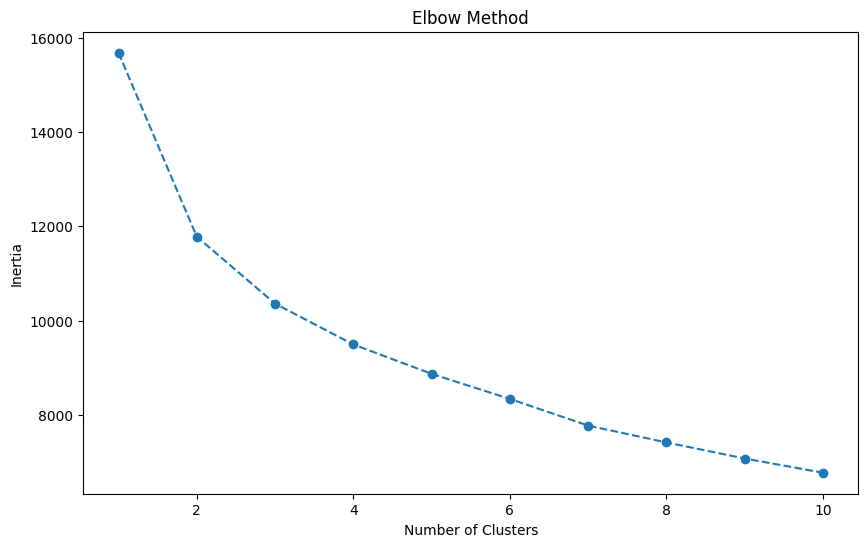

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features_for_clustering = ['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases',
                           'NumWebVisitsMonth', 'Years_Since_Registration', 'Age']

# Normalize features
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df[features_for_clustering])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customer_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [19]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df_scaled)

# Analyze characteristics of each cluster
cluster_characteristics = customer_df.groupby('Cluster')[features_for_clustering].mean()

# Menampilkan karakteristik cluster dalam bentuk tabel
print(cluster_characteristics)

               Income    Recency  NumWebPurchases  NumStorePurchases  \
Cluster                                                                
0        33745.088507  49.121704         2.033469           3.120690   
1        58915.534309  46.993388         7.059504           7.535537   
2        74140.658718  51.063174         4.428351           8.218798   

         NumWebVisitsMonth  Years_Since_Registration        Age  
Cluster                                                          
0                 6.598377                 11.088824  51.958418  
1                 6.239669                 11.553271  58.923967  
2                 2.508475                 10.941073  56.633282  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 2. Analisis Spesifikasi Laptop dan Prediksi Harga:

a. Memberikan informasi terkait spesifikasi laptop apa saja yang paling mempengaruhi tinggi dan rendahnya harga laptop

In [22]:
from sklearn.preprocessing import OneHotEncoder
#encoding
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
laptop_data_encoded = pd.get_dummies(laptop_df, columns=categorical_features)

# Pisahkan fitur dan target
X = laptop_data_encoded.drop('Price', axis=1)
y = laptop_data_encoded['Price']

# Inisialisasi SelectKBest dengan f_regression sebagai scoring function
selector = SelectKBest(score_func=f_regression, k='all')

# Fit dan transform data
X_selected = selector.fit_transform(X, y)

# Mendapatkan nama fitur terpilih
selected_features = X.columns[selector.get_support()]

# Mendapatkan skor fitur
feature_scores = selector.scores_

# Print fitur-fitur yang paling mempengaruhi tinggi dan rendahnya harga laptop
selected_features_df = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
selected_features_df.sort_values(by='Score', ascending=False, inplace=True)

print(selected_features_df)


                            Feature        Score
0                               Ram  1096.320184
6                               SSD   974.693069
35          Cpu_brand_Intel Core i7   690.235950
29                TypeName_Notebook   601.165809
4                               Ppi   381.924627
36  Cpu_brand_Other Intel Processor   346.500974
27                  TypeName_Gaming   192.330050
39                 Gpu_brand_Nvidia   185.835921
41                        Os_Others   175.170668
33          Cpu_brand_Intel Core i3   149.837669
30               TypeName_Ultrabook   131.690964
42                       Os_Windows   120.815586
3                               Ips   107.487603
7                      Company_Acer    84.382105
32          Cpu_brand_AMD Processor    71.070353
31             TypeName_Workstation    56.752822
37                    Gpu_brand_AMD    54.517444
2                       TouchScreen    49.860202
38                  Gpu_brand_Intel    48.859065
18                  

                            Feature        Score
0                               Ram  1096.320184
6                               SSD   974.693069
35          Cpu_brand_Intel Core i7   690.235950
29                TypeName_Notebook   601.165809
4                               Ppi   381.924627
36  Cpu_brand_Other Intel Processor   346.500974
27                  TypeName_Gaming   192.330050
39                 Gpu_brand_Nvidia   185.835921
41                        Os_Others   175.170668
33          Cpu_brand_Intel Core i3   149.837669
30               TypeName_Ultrabook   131.690964
42                       Os_Windows   120.815586
3                               Ips   107.487603
7                      Company_Acer    84.382105
32          Cpu_brand_AMD Processor    71.070353
31             TypeName_Workstation    56.752822
37                    Gpu_brand_AMD    54.517444
2                       TouchScreen    49.860202
38                  Gpu_brand_Intel    48.859065
18                  

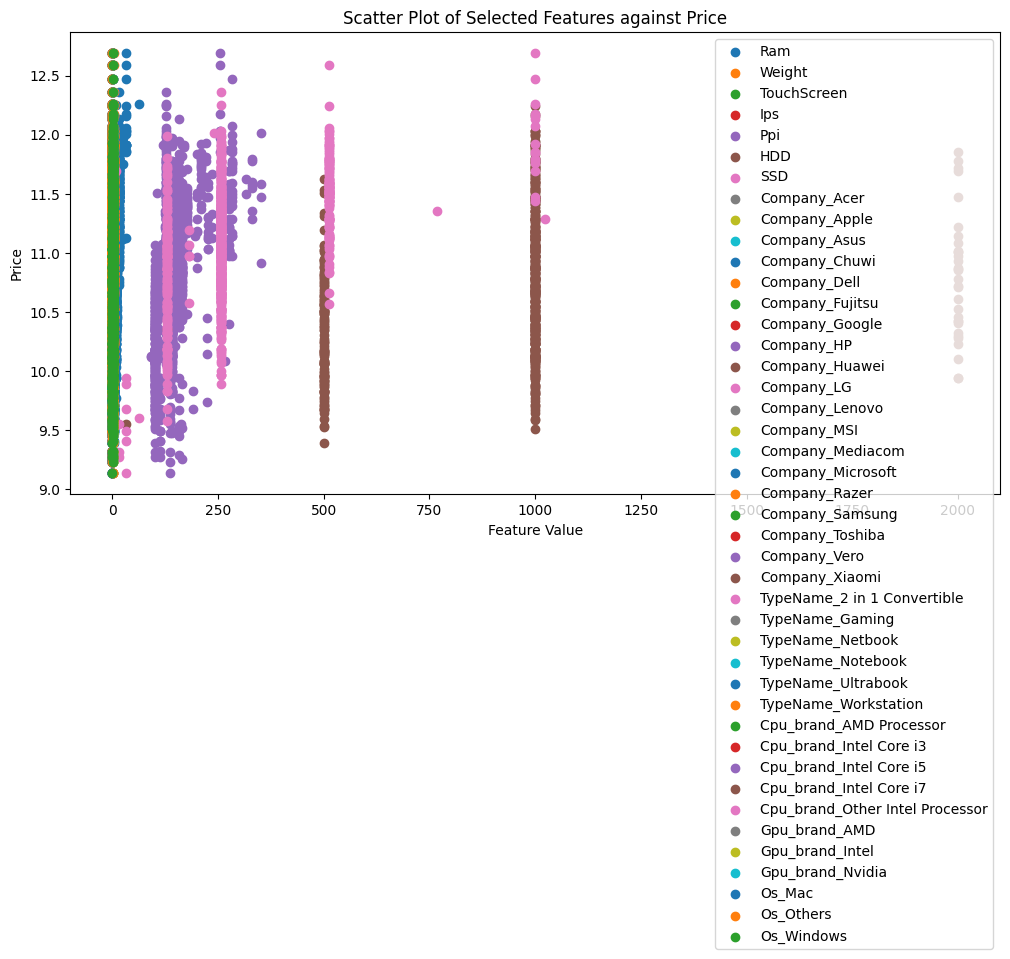

In [23]:
# One-hot encoding for categorical features
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
laptop_df_encoded = pd.get_dummies(laptop_df, columns=categorical_features)

# Separate features and target
X = laptop_data_encoded.drop('Price', axis=1)
y = laptop_data_encoded['Price']

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_

# Create DataFrame of selected features and scores
selected_features_df = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
selected_features_df.sort_values(by='Score', ascending=False, inplace=True)

# Print selected features and their scores
print(selected_features_df)

# Scatter plot of selected features against price
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.scatter(laptop_data_encoded[feature], y, label=feature)
plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot of Selected Features against Price')
plt.show()

b. Membuat sebuah persamaan model regresi linear untuk memprediksi harga dari sebuah laptop berdasarkan spesifikasi

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Encoding fitur kategorikal
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
laptop_df_encoded = pd.get_dummies(laptop_df, columns=categorical_features)

# Pilih fitur yang relevan
selected_features = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']
X = laptop_df_encoded[selected_features]
y = laptop_df_encoded['Price']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2 Score):", r2)

# Persamaan model regresi linear
print("\nPersamaan Model Regresi Linear:")
print("Price =", end=" ")
for i, feature in enumerate(selected_features):
    print(f"{model.coef_[i]:.2f} * {feature} +", end=" ")
print(f"{model.intercept_:.2f}")


Mean Squared Error: 0.1424241752174212
Coefficient of Determination (R^2 Score): 0.6404552517451372

Persamaan Model Regresi Linear:
Price = 0.04 * Ram + 0.08 * Weight + -0.03 * TouchScreen + 0.09 * Ips + 0.00 * Ppi + 0.00 * HDD + 0.00 * SSD + 9.59


In [25]:
laptop_df_encoded.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Windows
0,8,1.37,11.175755,0,1,226.983005,0,128,False,True,...,False,True,False,False,False,True,False,True,False,False
1,8,1.34,10.776777,0,0,127.677940,0,0,False,True,...,False,True,False,False,False,True,False,True,False,False
2,8,1.86,10.329931,0,0,141.211998,0,256,False,False,...,False,True,False,False,False,True,False,False,True,False
3,16,1.83,11.814476,0,1,220.534624,0,512,False,True,...,False,False,True,False,True,False,False,True,False,False
4,8,1.37,11.473101,0,1,226.983005,0,256,False,True,...,False,True,False,False,False,True,False,True,False,False
